<a href="https://colab.research.google.com/github/AswinBala007/kovai.co/blob/main/kovai_co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pub_transport = pd.read_csv("/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv")
pub_transport

,Date,MyWay,Paper Ticket
0,01/07/2019,66215,4325
1,15/09/2023,63800,7349
2,28/12/2021,9994,1882
3,11/01/2023,43769,3991
4,11/09/2021,3810,685
...,...,...,...
1773,19/01/2023,46083,4622
1774,16/08/2023,70115,6955
1775,10/01/2022,21932,2315
1776,04/05/2020,14842,854


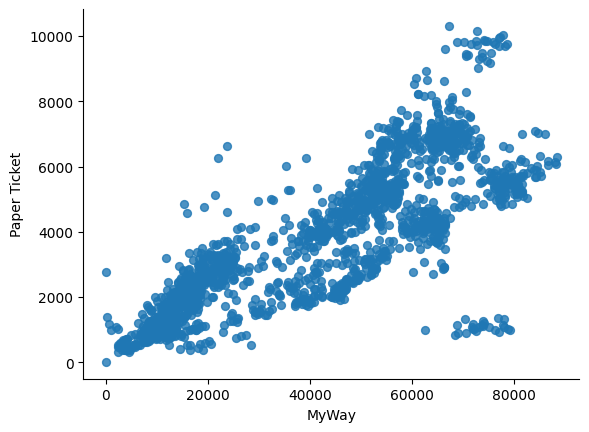

In [3]:
# @title MyWay vs Paper Ticket

from matplotlib import pyplot as plt
pub_transport.plot(kind='scatter', x='MyWay', y='Paper Ticket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
pub_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1778 non-null   object
 1   MyWay         1778 non-null   int64 
 2   Paper Ticket  1778 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.8+ KB


In [5]:
pub_transport.describe()


,MyWay,Paper Ticket
count,1778.000000,1778.000000
mean,40985.889201,3744.153543
std,23275.162569,2153.562760
min,0.000000,13.000000
25%,17207.750000,1991.500000
50%,45079.500000,3374.500000
75%,60946.500000,5383.000000
max,88313.000000,10310.000000


In [6]:
pub_transport.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

In [7]:
pub_transport.isin(["?",np.nan]).sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

In [8]:
pub_transport["Date"] = pd.to_datetime(pub_transport["Date"],dayfirst=True)

In [9]:
pub_transport.sort_values(by="Date")

,Date,MyWay,Paper Ticket
0,2019-07-01,66215,4325
1037,2019-07-02,69181,4764
1344,2019-07-03,68410,5086
1087,2019-07-04,68258,4750
1411,2019-07-05,64088,4919
...,...,...,...
1380,2024-05-08,72435,9850
1447,2024-05-09,71487,9768
43,2024-05-10,67172,10310
1227,2024-05-11,54,2766


In [10]:
import datetime

In [11]:
apr_data = pub_transport[(pub_transport["Date"]>=pd.to_datetime("2023-04-01")) & (pub_transport["Date"]<=pd.to_datetime("2024-04-30"))]
apr_data

,Date,MyWay,Paper Ticket
1,2023-09-15,63800,7349
10,2023-08-29,69155,6507
19,2023-04-11,50246,4306
27,2023-09-17,19207,2368
33,2023-10-07,24249,3089
...,...,...,...
1767,2024-03-20,76782,1346
1768,2023-07-13,49311,4309
1770,2024-04-14,18001,2844
1774,2023-08-16,70115,6955


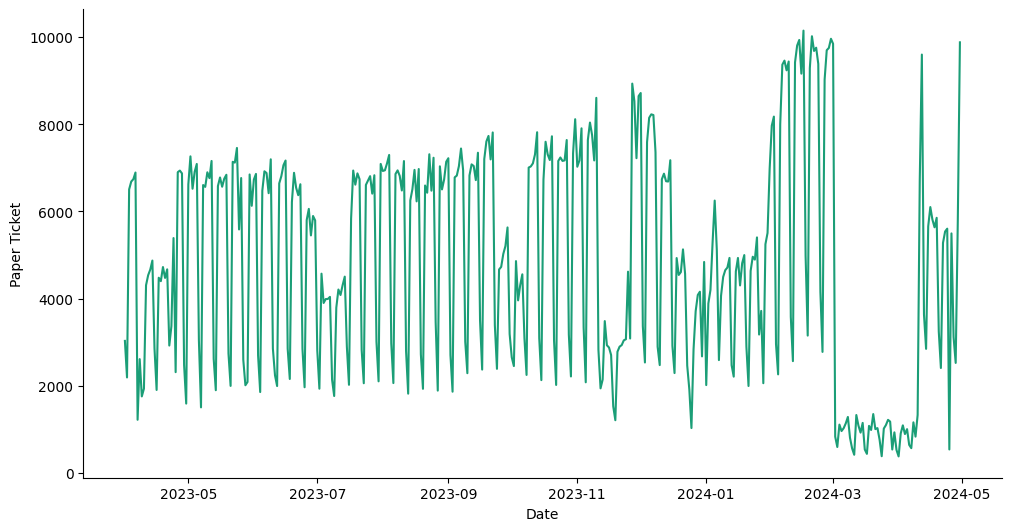

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Paper Ticket']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = apr_data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Paper Ticket')

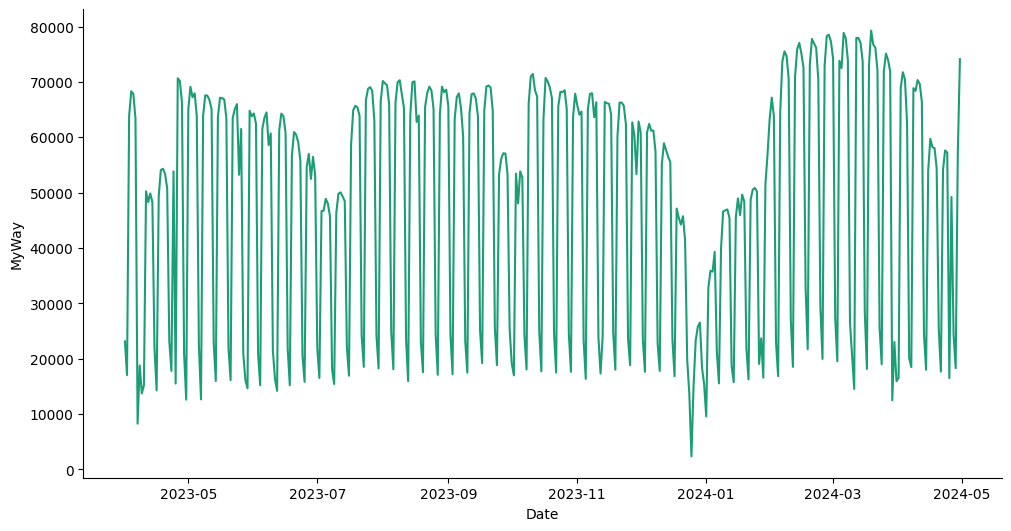

In [13]:
# @title Date vs MyWay

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['MyWay']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = apr_data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('MyWay')

In [14]:
apr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          396 non-null    datetime64[ns]
 1   MyWay         396 non-null    int64         
 2   Paper Ticket  396 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 12.4 KB


In [15]:
apr_data.describe()

,Date,MyWay,Paper Ticket
count,396,396.000000,396.000000
mean,2023-10-15 12:00:00,48324.664141,4789.712121
min,2023-04-01 00:00:00,2345.000000,373.000000
25%,2023-07-08 18:00:00,23246.250000,2592.000000
50%,2023-10-15 12:00:00,56824.000000,4770.000000
75%,2024-01-22 06:00:00,66537.750000,6900.500000
max,2024-04-30 00:00:00,79279.000000,10154.000000
std,NaN,21774.787575,2541.356289


In [16]:
apr_data.corr()

,Date,MyWay,Paper Ticket
Date,1.000000,0.046483,-0.145373
MyWay,0.046483,1.000000,0.681837
Paper Ticket,-0.145373,0.681837,1.000000


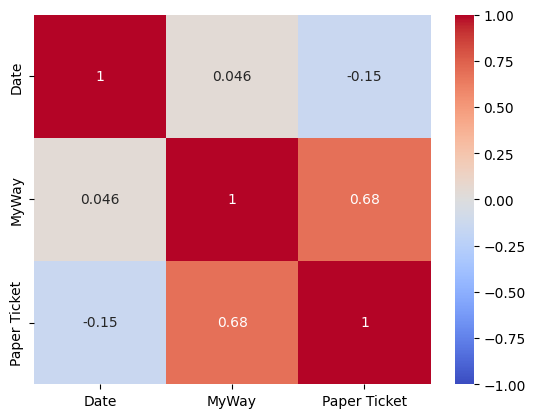

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = apr_data.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

In [18]:
apr_data

,Date,MyWay,Paper Ticket
1,2023-09-15,63800,7349
10,2023-08-29,69155,6507
19,2023-04-11,50246,4306
27,2023-09-17,19207,2368
33,2023-10-07,24249,3089
...,...,...,...
1767,2024-03-20,76782,1346
1768,2023-07-13,49311,4309
1770,2024-04-14,18001,2844
1774,2023-08-16,70115,6955


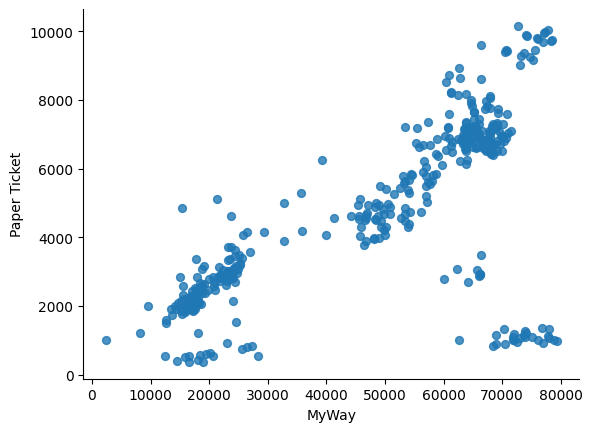

In [19]:
from matplotlib import pyplot as plt
apr_data.plot(kind='scatter', x='MyWay', y='Paper Ticket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
from sklearn.model_selection import train_test_split

pub_transport

,Date,MyWay,Paper Ticket
0,2019-07-01,66215,4325
1,2023-09-15,63800,7349
2,2021-12-28,9994,1882
3,2023-01-11,43769,3991
4,2021-09-11,3810,685
...,...,...,...
1773,2023-01-19,46083,4622
1774,2023-08-16,70115,6955
1775,2022-01-10,21932,2315
1776,2020-05-04,14842,854


<Axes: xlabel='MyWay'>

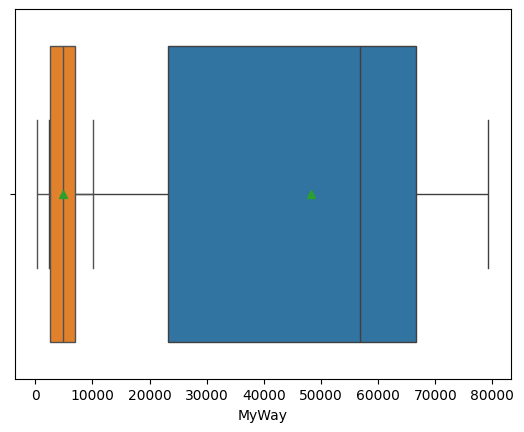

In [21]:
import seaborn as sns

sns.boxplot(x=apr_data["MyWay"], showmeans=True)
sns.boxplot(x=apr_data["Paper Ticket"], showmeans=True)


<Axes: xlabel='MyWay'>

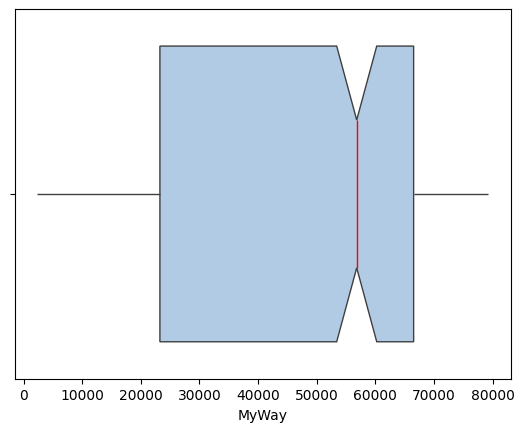

In [22]:
sns.boxplot(x=apr_data["MyWay"], notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "red"})

<Axes: xlabel='MyWay'>

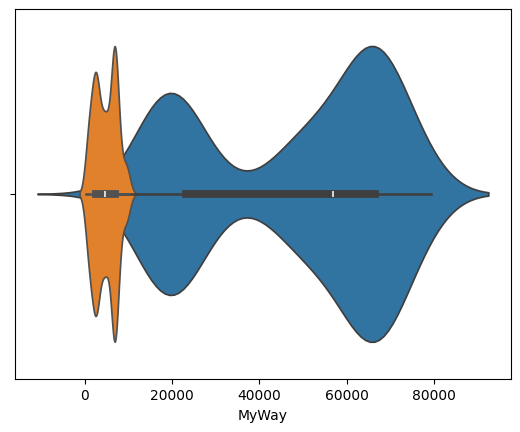

In [23]:
sns.violinplot(data=apr_data, x="MyWay")
sns.violinplot(data=apr_data, x="Paper Ticket")

<Axes: xlabel='Paper Ticket'>

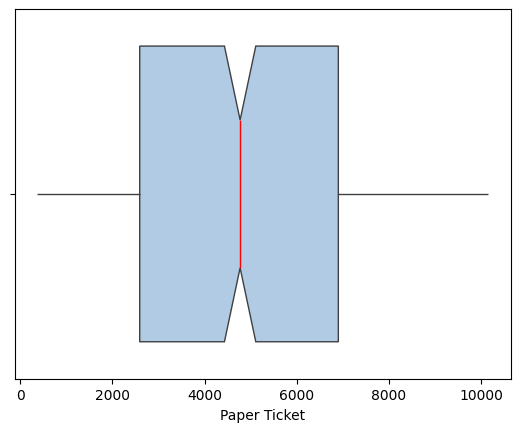

In [24]:
sns.boxplot(x=apr_data["Paper Ticket"], notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "red"})

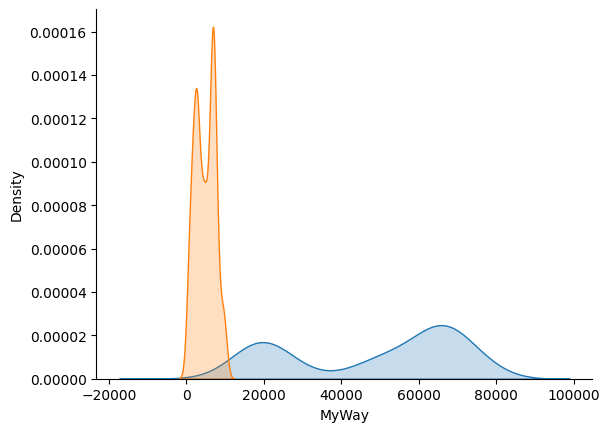

In [25]:
import matplotlib.pyplot as plt
sns.kdeplot(data=apr_data, x="MyWay", fill=True)
sns.kdeplot(data=apr_data, x="Paper Ticket", fill=True)
plt.gca().spines[['top', 'right',]].set_visible(False)


<Axes: xlabel='Paper Ticket', ylabel='Density'>

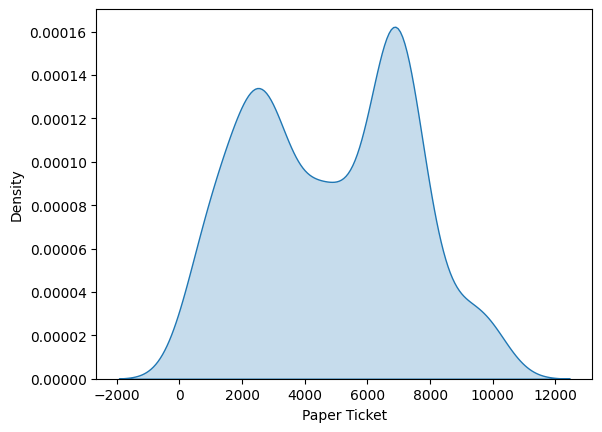

In [26]:
sns.kdeplot(data=apr_data, x="Paper Ticket", fill=True)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(pub_transport.iloc[:,:-1],pub_transport.iloc[:,-1],test_size=0.3,random_state =42)

In [28]:
?train_test_split

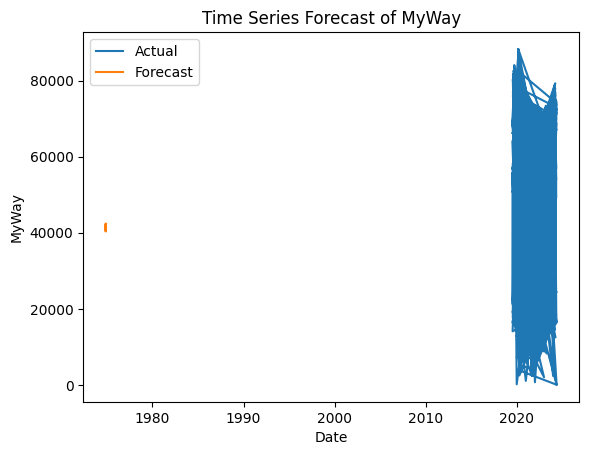

In [29]:
# prompt: generate a time forcast model to predict MyWay based on date on pub_transport

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create a time series model
model = sm.tsa.statespace.SARIMAX(pub_transport['MyWay'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
forecast = results.forecast(steps=12)

# Plot the predictions
plt.plot(pub_transport['Date'], pub_transport['MyWay'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.title('Time Series Forecast of MyWay')
plt.legend()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Example time series data
# date_series = pd.date_range(start='2020-01-01', periods=100)
# feature_series = np.random.rand(100)  # Random feature values for demonstration

# Create a DataFrame
# df = pd.DataFrame({'date': date_series, 'feature': feature_series})
df=pub_transport.iloc[:,:-1]
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
# train, test = df['MyWay'][:train_size], df['MyWay'][train_size:]
may = df[df["Date"]>=pd.to_datetime("2023-05-01")]
test = may["MyWay"]
train = df["MyWay"][:train_size]
# Fit ARIMA model to the training data
model = ARIMA(train, order=(5,1,0))  # Example order, you can tune this
model_fit = model.fit()

# Forecast future values for the testing data
forecast = model_fit.forecast(steps=len(test))

# Print the forecasted values
print("Forecasted values:")
print(forecast)

# Evaluate the model
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)


Forecasted values:
1422    43992.312482
1423    40240.028210
1424    42744.754300
1425    40411.062286
1426    44111.149541
            ...     
1795    43828.414686
1796    43828.414686
1797    43828.414686
1798    43828.414686
1799    43828.414686
Name: predicted_mean, Length: 378, dtype: float64
Mean Squared Error: 508451182.0360264


In [32]:
from statsmodels.tsa.ar_model import AutoReg
lag = 10  # Example lag order, you can tune this
model = AutoReg(train, lags=lag)
model_fit = model.fit()

# Forecast future values for the testing data
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Print the forecasted values
print("Forecasted values:")
print(forecast)

# Evaluate the model
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)
print(model_fit.summary())

Forecasted values:
1422    41719.064982
1423    40343.638286
1424    42427.855518
1425    43234.400178
1426    39379.393883
            ...     
1795    40665.041556
1796    40665.041556
1797    40665.041556
1798    40665.041556
1799    40665.041556
Length: 378, dtype: float64
Mean Squared Error: 552370737.3894142
                            AutoReg Model Results                             
Dep. Variable:                  MyWay   No. Observations:                 1422
Model:                    AutoReg(10)   Log Likelihood              -16202.927
Method:               Conditional MLE   S.D. of innovations          23300.309
Date:                Mon, 13 May 2024   AIC                          32429.853
Time:                        07:29:20   BIC                          32492.886
Sample:                            10   HQIC                         32453.406
                                 1422                                         
                 coef    std err          z      P>|

In [33]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train, seasonal=False, suppress_warnings=True)
arima_model.fit(train)
arima_forecast = arima_model.predict(len(test))

arima_mse = mean_squared_error(test, arima_forecast)

print("Best ARIMA Parameters (p, d, q):", arima_model.order)
print("ARIMA MSE:", arima_mse)

# Now, perform AutoReg to find best AR parameters
best_ar_mse = float('inf')
best_ar_lag = None

for p in range(1, 6):
    try:
        ar_model = AutoReg(train, lags=p)
        ar_model_fit = ar_model.fit()

        ar_forecast = ar_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

        mse = mean_squared_error(test, ar_forecast)

        if mse < best_ar_mse:
            best_ar_mse = mse
            best_ar_lag = p
    except:
        continue

print("Best AR Parameters (lag):", best_ar_lag)
print("AR MSE:", best_ar_mse)

Best ARIMA Parameters (p, d, q): (0, 0, 0)
ARIMA MSE: 551560184.8280785
Best AR Parameters (lag): 1
AR MSE: 551862531.656881


In [34]:
data = df

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data_range = data[(data['Date'] >= '2023-04-01') & (data['Date'] <= '2024-04-30')]
data_range['MyWay'] = data_range['MyWay'].astype(float)


X = data_range[['MyWay']]
y = data_range['MyWay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

start_date = datetime(2024, 5, 1)
end_date = datetime(2024, 5, 7)
predicted_dates = [start_date + timedelta(days=i) for i in range(7)]
predicted_patronage = model.predict(X_test)

print("Predicted Patronage for the next 7 days (1st May 2024 – 7th May 2024):")
for date, patronage in zip(predicted_dates, predicted_patronage):
    print(f"{date.strftime('%d/%m/%Y')}: {patronage}")

Predicted Patronage for the next 7 days (1st May 2024 – 7th May 2024):
01/05/2024: 71441.0
02/05/2024: 18013.000000000004
03/05/2024: 62458.99999999999
04/05/2024: 53327.99999999999
05/05/2024: 76782.0
06/05/2024: 50218.99999999999
07/05/2024: 65596.0


<ipython-input-35-cd1ec8e8826c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_range['MyWay'] = data_range['MyWay'].astype(float)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Assuming 'data' is your DataFrame

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
date_range = data
data_range['MyWay'] = data_range['MyWay'].astype(float)

X = data_range[['MyWay']]
y = data_range['MyWay']

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation with TimeSeriesSplit (since it's a time series data)
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

# Average MSE across folds
avg_mse = -cv_scores.mean()
print("Average MSE:", avg_mse)

# Prediction for the next 7 days
start_date = datetime(2024, 5, 1)
end_date = datetime(2024, 5, 7)
predicted_dates = [start_date + timedelta(days=i) for i in range(7)]
predicted_patronage = model.predict(X_test)

print("Predicted Patronage for the next 7 days (1st May 2024 – 7th May 2024):")
for date, patronage in zip(predicted_dates, predicted_patronage):
    print(f"{date.strftime('%d/%m/%Y')}: {patronage}")
print(model.score(X_test,predicted_patronage))

Average MSE: 1.0206931539320195e-23
Predicted Patronage for the next 7 days (1st May 2024 – 7th May 2024):
01/05/2024: 71441.0
02/05/2024: 18013.000000000004
03/05/2024: 62458.99999999999
04/05/2024: 53327.99999999999
05/05/2024: 76782.0
06/05/2024: 50218.99999999999
07/05/2024: 65596.0
1.0


<ipython-input-36-7ef29bbe8735>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_range['MyWay'] = data_range['MyWay'].astype(float)


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta

# Assuming 'data' is your DataFrame

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data_range = data[(data['Date'] >= '2023-04-01') & (data['Date'] <= '2024-04-30')]
data_range['MyWay'] = data_range['MyWay'].astype(float)

X = data_range[['MyWay']]
y = data_range['MyWay']

# Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
model.fit(X_train, y_train)

# Cross-validation with TimeSeriesSplit (since it's a time series data)
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

# Average MSE across folds
avg_mse = -cv_scores.mean()
print("Average MSE:", avg_mse)

# Prediction for the next 7 days
start_date = datetime(2024, 5, 1)
end_date = datetime(2024, 5, 7)
predicted_dates = [start_date + timedelta(days=i) for i in range(7)]
predicted_patronage = model.predict(X_test)

print("Predicted Patronage for the next 7 days (1st May 2024 – 7th May 2024):")
for date, patronage in zip(predicted_dates, predicted_patronage):
    print(f"{date.strftime('%d/%m/%Y')}: {patronage}")


<ipython-input-37-f051684adf25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_range['MyWay'] = data_range['MyWay'].astype(float)


Average MSE: 422603.75730999996
Predicted Patronage for the next 7 days (1st May 2024 – 7th May 2024):
01/05/2024: 71648.66
02/05/2024: 18026.0
03/05/2024: 62439.09
04/05/2024: 53340.56
05/05/2024: 77021.19
06/05/2024: 50224.9
07/05/2024: 65582.39


<ipython-input-39-7732eccb67d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_range['MyWay'] = data_range['MyWay'].astype(float)


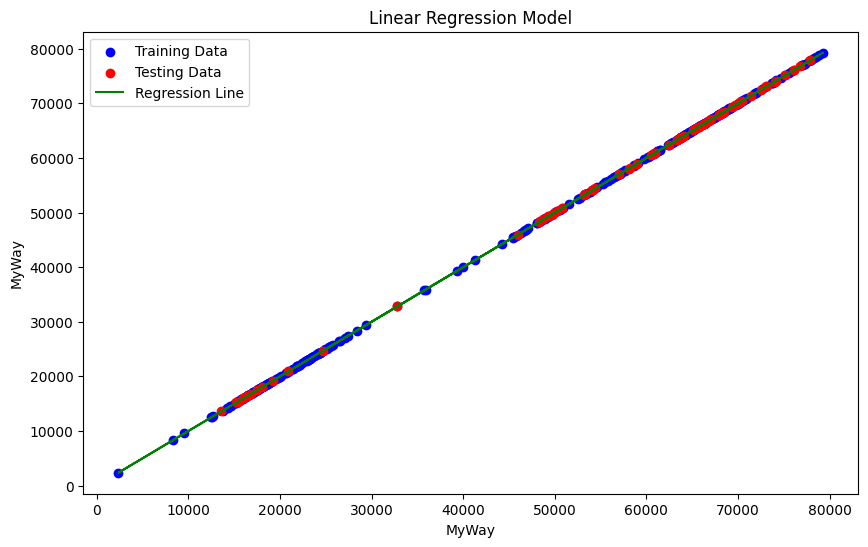

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Filter data for the required date range
data_range = data[(data['Date'] >= '2023-04-01') & (data['Date'] <= '2024-04-30')]
data_range['MyWay'] = data_range['MyWay'].astype(float)

# Split data into features (X) and target (y)
X = data_range[['MyWay']]
y = data_range['MyWay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')  # Plot training data points
plt.scatter(X_test, y_test, color='red', label='Testing Data')  # Plot testing data points
plt.plot(X_train, model.predict(X_train), color='green', label='Regression Line')  # Plot regression line
plt.xlabel('MyWay')
plt.ylabel('MyWay')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


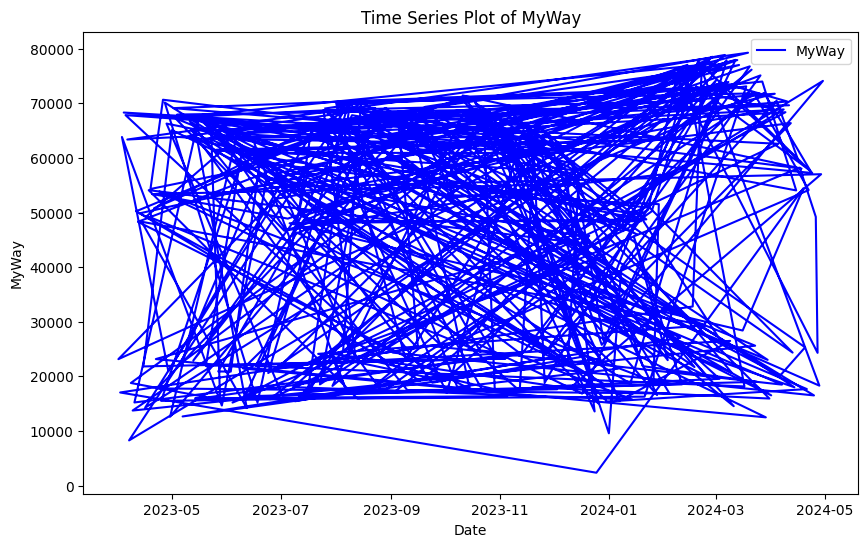

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(data_range['Date'], data_range['MyWay'], label='MyWay', color='blue')
plt.title('Time Series Plot of MyWay')
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.legend()
plt.show()

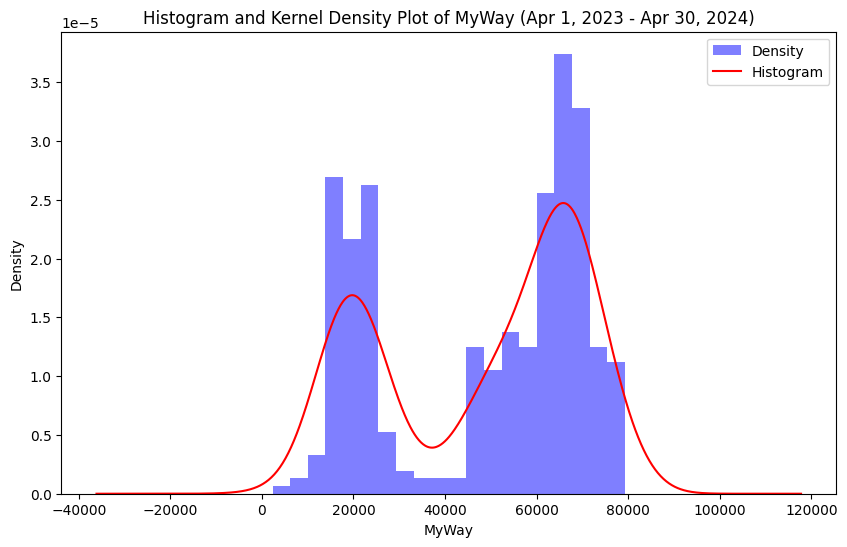

In [45]:
plt.figure(figsize=(10, 6))
data_range['MyWay'].plot(kind='hist', bins=20, density=True, alpha=0.5, color='blue')
data_range['MyWay'].plot(kind='kde', color='red')
plt.title('Histogram and Kernel Density Plot of MyWay (Apr 1, 2023 - Apr 30, 2024)')
plt.xlabel('MyWay')
plt.ylabel('Density')
plt.legend(['Density', 'Histogram'])

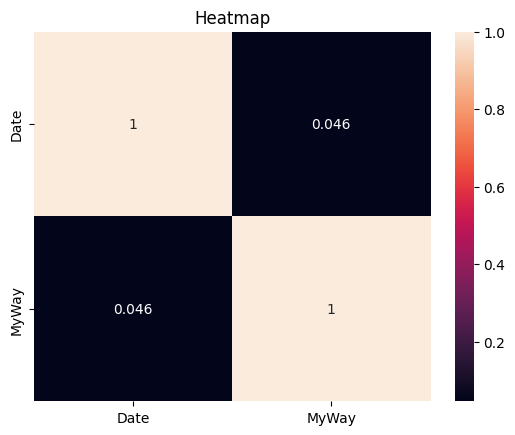

In [44]:
correlation_matrix = data_range.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap')
plt.show()

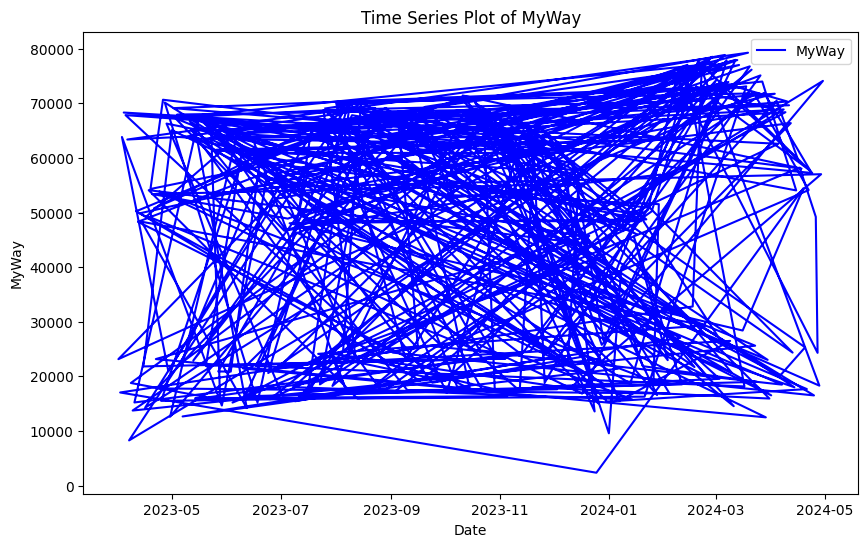

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(data_range['Date'], data_range['MyWay'], label='MyWay', color='blue')
plt.title('Time Series Plot of MyWay')
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.legend()
plt.show()